In [1]:
import rasterio

In [2]:
import numpy as np
from math import sqrt
from fractions import Fraction
from decimal import Decimal
from itertools import combinations
from matplotlib import pyplot as plt
from scipy import odr

In [3]:
from test_script import attenuation_coef_ratio

In [4]:
from rasterio.plot import show

In [5]:
import os

In [6]:
# Data dir
data_dir = "data"
fp = os.path.join(data_dir, "valle_sentinel-2_korjattu.tif")

# Open the file:
raster = rasterio.open(fp)

# Check type of the variable 'raster'
type(raster)

rasterio.io.DatasetReader

In [7]:
# Projection
raster.crs

CRS.from_epsg(4326)

In [8]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
raster.transform

Affine(1.0, 0.0, 26.0,
       0.0, 1.0, 69.0)

In [9]:
# Dimensions
print(raster.width)
print(raster.height)

2
1


In [10]:
# Number of bands
raster.count

23

In [11]:
# All Metadata for the whole raster dataset
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 2,
 'height': 1,
 'count': 23,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(1.0, 0.0, 26.0,
        0.0, 1.0, 69.0)}

In [12]:
# Read the raster band as separate variable
band1 = raster.read(1)

# Check type of the variable 'band'
print(type(band1))

# Data type of the values
print(band1.dtype)

<class 'numpy.ndarray'>
float32


In [13]:
# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': nan, 'mean': nan, 'median': nan, 'max': nan},
 {'min': n

TypeError: Invalid shape (2,) for image data

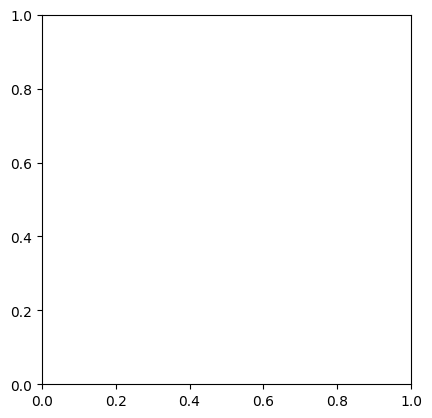

In [14]:
# https://towardsdatascience.com/reading-and-visualizing-geotiff-images-with-python-8dcca7a74510
show(raster.read(2))

In [6]:
img.shape

(372, 294)

In [11]:
# load raster to numpy array
imgarr = img.read(3)
print(imgarr.shape) # this is a 3D numpy array, with dimensions [band, row, col]

(372, 294)


ValueError: not enough values to unpack (expected 3, got 2)

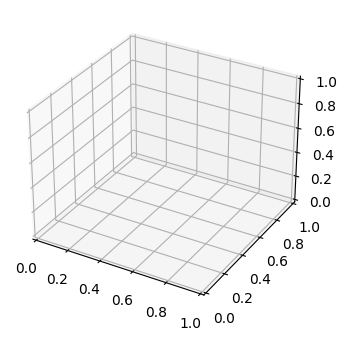

In [105]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, x, y = imgarr.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()

In [8]:
type(imgarr)

numpy.ndarray

In [9]:
coef_ratio = attenuation_coef_ratio(band_i=imgarr[3],
                                    band_j=imgarr[2],
                                    apply_log=True)

In [10]:
print(coef_ratio)

nan


In [11]:
print(imgarr)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [12]:
print(img)

<open DatasetReader name='data/valle_sentinel-2.tif' mode='r'>


In [104]:
imgarr.view

<function ndarray.view>